In [81]:
import os
import pandas as pd
import xml.etree.ElementTree as ET
from natsort import natsorted
import matplotlib.pyplot as plt

wd = '/home/max_vdl/bioinf_isilon/core_bioinformatics_unit/Internal/max_vdl/coreBioinf/kalinchenko/tissueGeneEx'

rna_expression_df_main = pd.read_csv(f'{wd}/data/proteomicsDB/mainProts.csv')
rna_expression_df_main = rna_expression_df_main.pivot(index='Tissue Name', columns='Gene Name', values='Avarage Normalized Intensity')
rna_expression_df_main.index = rna_expression_df_main.index.str.capitalize()
selected_tissues = ['Tonsil', 'Vermiform appendix', 'Bone marrow', 'Spleen', 'Lymph node',
       'Brain', 'Cerebellum', 'Cerebral cortex', 'Prefrontal cortex', 'Temporal lobe',
       'Thyroid gland', 'Adrenal gland', 'Prostate gland', 'Pancreas']

In [82]:
order = ['Tonsil', 'Vermiform appendix', 'Bone marrow', 'Spleen', 'Lymph node',
       'Brain', 'Cerebellum', 'Cerebral cortex', 'Prefrontal cortex', 'Temporal lobe', 'Corpus callosum',
       'Adipose tissue', 'Skeletal muscle', 'Smooth muscle', 
       'Thyroid gland', 'Adrenal gland', 'Prostate gland', 'Pancreas',
       'Mammary gland', 'Uterine cervix', 'Ovary', 'Uterine endometrium', 'Breast', 'Placenta', 
       'Colon', 'Duodenum', 'Esophagus', 'Gall bladder', 'Rectum', 'Salivary gland', 'Small intestine', 'Stomach', 'Tube',
       'Epididymis', 'Seminal vesicle', 'Testis',
       'Kidney', 'Urinary bladder',
       'Liver',
       'Lung',
       'Heart', 'Skin']
organ = {'Bone marrow & Lymphoid tissues': ['Tonsil', 'Vermiform appendix', 'Bone marrow', 'Spleen', 'Lymph node'],
       'Brain': ['Brain', 'Cerebellum', 'Cerebral cortex', 'Prefrontal cortex', 'Temporal lobe', 'Corpus callosum'],
       'Connective & Soft tissue': ['Adipose tissue', 'Skeletal muscle', 'Smooth muscle'], 
       'Endocrine tissues': ['Thyroid gland', 'Adrenal gland', 'Prostate gland', 'Pancreas'],
       'Female tissues': ['Mammary gland', 'Uterine cervix', 'Ovary', 'Uterine endometrium', 'Breast', 'Placenta'], 
       'Gastrointestinal tract': ['Colon', 'Duodenum', 'Esophagus', 'Gall bladder', 'Rectum', 'Salivary gland', 'Small intestine', 'Stomach', 'Tube'],
       'Male tissues': ['Epididymis', 'Seminal vesicle', 'Testis'],
       'Kidney & Urinary bladder': ['Kidney', 'Urinary bladder'],
       'Liver & Gallbladder': ['Liver'],
       'Respiratory system': ['Lung'],
       'Skin': ['Heart', 'Skin']}
color_dict = {'Bone marrow & Lymphoid tissues': 'blue',
    'Brain': 'orange',
    'Connective & Soft tissue': 'green',
    'Endocrine tissues': 'red',
    'Eye': 'purple',
    'Female tissues': 'brown',
    'Gastrointestinal tract': 'pink',
    'Kidney & Urinary bladder': 'gray',
    'Liver & Gallbladder': 'olive',
    'Male tissues': 'cyan',
    'Muscle tissues': 'navy',
    'Pancreas': 'lavender',
    'Proximal digestive tract': 'coral',
    'Respiratory system': 'teal',
    'Skin': 'magenta'}
tissue_organs = {}
for key, values in organ.items():
    for value in values:
        tissue_organs[value] = key
rna_expression_df_main['organ'] = rna_expression_df_main.index.to_series().map(tissue_organs)
rna_expression_df_main['color'] = rna_expression_df_main['organ'].map(color_dict)
rna_expression_df_main = rna_expression_df_main.reindex(order)
rna_expression_df_main




Gene Name,ICMT,PLEK,RCE1,SPTLC1,SPTLC2,SPTSSA,ZDHHC17,organ,color
Tissue Name,,,,,,,,,
Tonsil,1.03,2.03,0.76,1.59,1.10,1.07,0.99,Bone marrow & Lymphoid tissues,blue
Vermiform appendix,1.28,2.13,1.00,1.67,1.24,1.45,1.17,Bone marrow & Lymphoid tissues,blue
Bone marrow,0.40,2.57,1.10,1.33,1.33,0.54,1.13,Bone marrow & Lymphoid tissues,blue
Spleen,1.11,2.10,0.94,1.64,1.43,1.25,1.25,Bone marrow & Lymphoid tissues,blue
Lymph node,1.19,1.73,1.01,1.45,1.05,1.09,1.10,Bone marrow & Lymphoid tissues,blue
Brain,1.15,0.20,0.73,1.44,1.26,1.13,1.56,Brain,orange
Cerebellum,1.32,-0.60,1.51,1.41,0.83,0.89,1.84,Brain,orange
Cerebral cortex,1.25,0.94,0.86,1.80,1.39,1.40,1.66,Brain,orange
Prefrontal cortex,1.21,-0.13,0.88,1.59,1.24,0.73,1.58,Brain,orange


In [83]:
rna_expression_df_zinc = pd.read_csv(f'{wd}/data/proteomicsDB/zincProts.csv')
rna_expression_df_zinc = rna_expression_df_zinc.pivot(index='Tissue Name', columns='Gene Name', values='Avarage Normalized Intensity')
rna_expression_df_zinc.index = rna_expression_df_zinc.index.str.capitalize()
rna_expression_df_zinc.reindex(order)
colorder = natsorted(list(rna_expression_df_zinc.columns))
rna_expression_df_zinc = rna_expression_df_zinc.reindex(colorder, axis=1)
rna_expression_df_zinc['organ'] = rna_expression_df_zinc.index.to_series().map(tissue_organs)
rna_expression_df_zinc['color'] = rna_expression_df_zinc['organ'].map(color_dict)
rna_expression_df_zinc = rna_expression_df_zinc.reindex(order)
rna_expression_df_zinc

Gene Name,ZDHHC1,ZDHHC2,ZDHHC3,ZDHHC4,ZDHHC5,ZDHHC6,ZDHHC7,ZDHHC8,ZDHHC9,ZDHHC11,...,ZDHHC17,ZDHHC18,ZDHHC19,ZDHHC20,ZDHHC21,ZDHHC22,ZDHHC23,ZDHHC24,organ,color
Tissue Name,,,,,,,,,,,,,,,,,,,,,
Tonsil,0.08,1.05,1.26,1.36,1.50,1.47,1.36,1.05,0.80,-0.15,...,0.99,1.30,NaN,1.30,0.76,NaN,0.11,0.48,Bone marrow & Lymphoid tissues,blue
Vermiform appendix,0.58,1.19,1.29,1.41,1.56,1.53,1.54,1.41,1.16,-0.22,...,1.17,1.58,-0.30,1.41,0.80,NaN,0.20,0.65,Bone marrow & Lymphoid tissues,blue
Bone marrow,-0.70,1.30,1.44,1.12,1.25,1.14,1.61,0.84,0.53,-0.40,...,1.13,1.88,-1.00,1.30,0.20,NaN,-0.40,0.51,Bone marrow & Lymphoid tissues,blue
Spleen,1.13,1.17,1.27,1.35,1.54,1.51,1.58,1.48,0.71,0.38,...,1.25,1.54,-1.00,1.38,0.89,NaN,0.15,0.87,Bone marrow & Lymphoid tissues,blue
Lymph node,0.28,1.00,1.27,1.33,1.34,1.45,1.42,1.25,0.75,0.03,...,1.10,1.27,-0.57,1.37,0.66,NaN,0.16,0.60,Bone marrow & Lymphoid tissues,blue
Brain,0.58,1.10,1.31,1.52,1.09,1.14,1.17,1.24,1.64,1.17,...,1.56,1.06,-0.28,1.57,0.74,1.37,0.62,0.72,Brain,orange
Cerebellum,0.77,1.34,1.54,1.02,1.34,0.78,1.30,1.77,0.97,1.86,...,1.84,1.39,-0.28,0.97,0.78,1.13,0.23,0.72,Brain,orange
Cerebral cortex,0.79,1.32,1.25,1.55,1.36,1.39,1.41,1.45,1.85,0.46,...,1.66,1.26,-1.00,1.42,1.20,1.81,0.79,0.83,Brain,orange
Prefrontal cortex,0.73,0.96,1.50,1.41,1.11,1.14,1.11,1.48,1.42,1.34,...,1.58,1.20,-0.05,1.55,0.71,1.35,0.75,0.67,Brain,orange


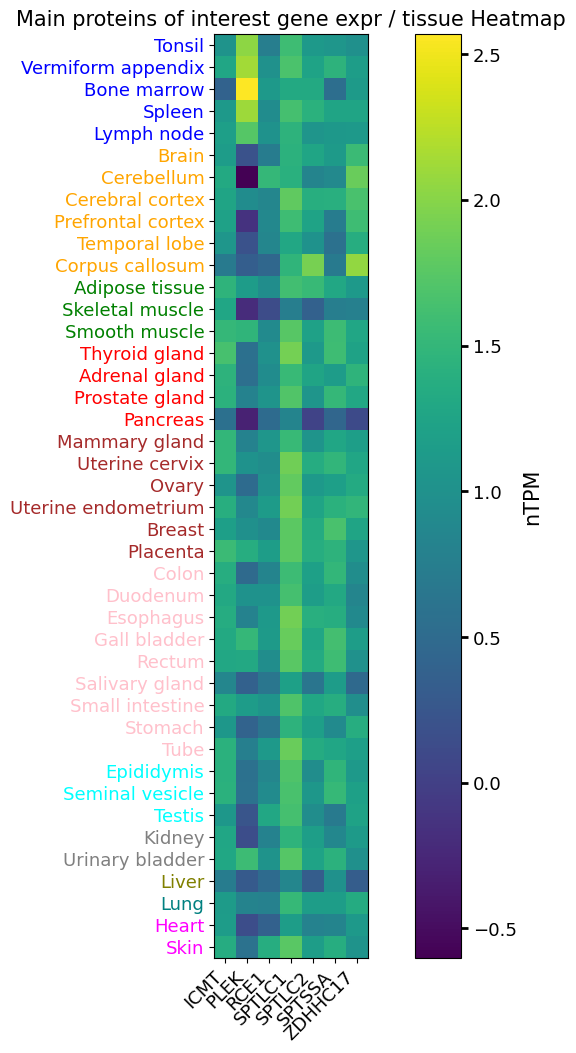

In [84]:
# Create the heatmap using matplotlib
fig, ax = plt.subplots(figsize=(12, 12))
df = rna_expression_df_main.iloc[:, :-2]
im = ax.imshow(df, cmap='viridis')

# Add x and y axis labels
ax.set_xticks(range(len(df.columns)))
ax.set_xticklabels(df.columns, fontsize=13, rotation=45, ha='right')
ax.set_yticks(range(len(df.index)))
ax.set_yticklabels(df.index, fontsize=13)

# colour labels by organ
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_color(rna_expression_df_main.loc[tick.label1.get_text()]['color']) #set the color property

# Add a colorbar legend
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=13, length=5, width=2)
cbar.set_label("nTPM", fontsize=15)

# Add a title
ax.set_title('Main proteins of interest gene expr / tissue Heatmap', fontsize=15)

# Show/Save the plot
plt.show()
directory = os.path.expanduser("~/bioinf_isilon/core_bioinformatics_unit/Internal/max_vdl/coreBioinf/kalinchenko/tissueGeneEx/")
fig.savefig(f'{directory}/plots/proteomicsDB/mainProts.pdf', bbox_inches='tight')


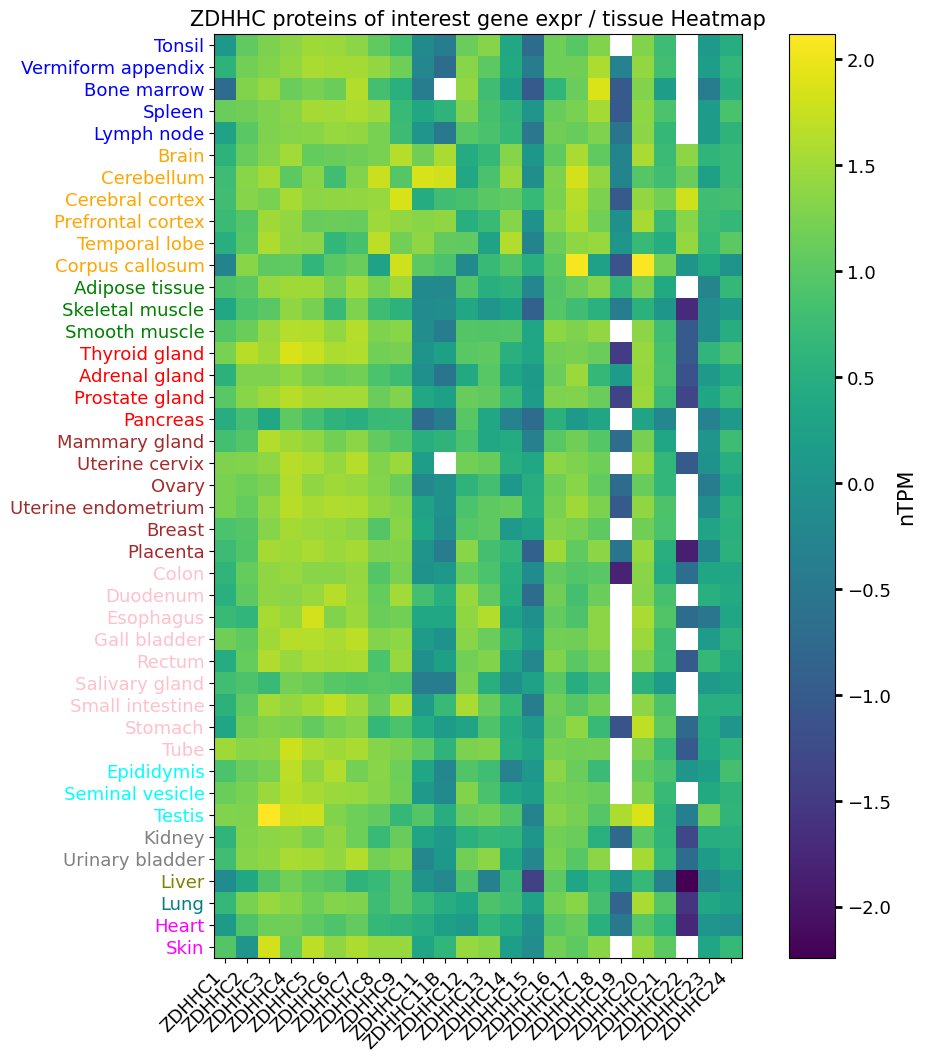

In [85]:
# Create the heatmap using matplotlib
fig, ax = plt.subplots(figsize=(12, 12))
df = rna_expression_df_zinc.iloc[:, :-2]
im = ax.imshow(df, cmap='viridis')

# Add x and y axis labels
ax.set_xticks(range(len(df.columns)))
ax.set_xticklabels(df.columns, fontsize=13, rotation=45, ha='right')
ax.set_yticks(range(len(df.index)))
ax.set_yticklabels(df.index, fontsize=13)

# colour labels by organ
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_color(rna_expression_df_zinc.loc[tick.label1.get_text()]['color']) #set the color property

# Add a colorbar legend
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=13, length=5, width=2)
cbar.set_label("nTPM", fontsize=15)

# Add a title
ax.set_title('ZDHHC proteins of interest gene expr / tissue Heatmap', fontsize=15)

# Show/Save the plot
plt.show()
directory = os.path.expanduser("~/bioinf_isilon/core_bioinformatics_unit/Internal/max_vdl/coreBioinf/kalinchenko/tissueGeneEx/")
fig.savefig(f'{directory}/plots/proteomicsDB/zincProts.pdf', bbox_inches='tight')


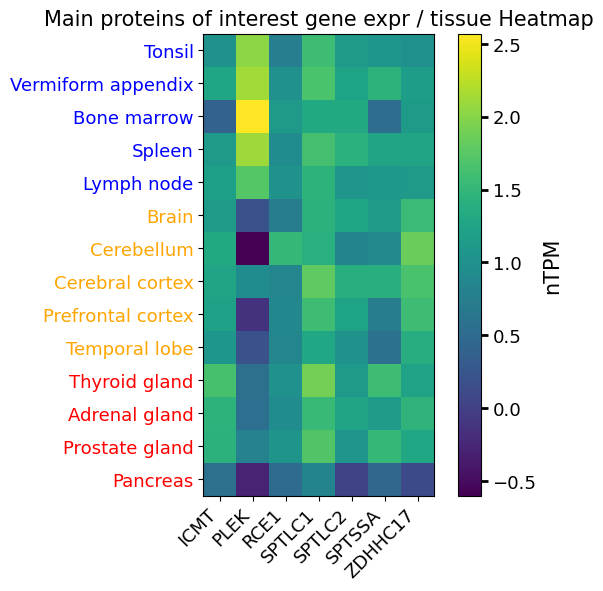

In [89]:
# Create the heatmap using matplotlib
fig, ax = plt.subplots(figsize=(6, 6))
df = rna_expression_df_main.loc[selected_tissues]
df = df.iloc[:, :-2]
im = ax.imshow(df, cmap='viridis')

# Add x and y axis labels
ax.set_xticks(range(len(df.columns)))
ax.set_xticklabels(df.columns, fontsize=13, rotation=45, ha='right')
ax.set_yticks(range(len(df.index)))
ax.set_yticklabels(df.index, fontsize=13)

# colour labels by organ
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_color(rna_expression_df_main.loc[tick.label1.get_text()]['color']) #set the color property

# Add a colorbar legend
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=13, length=5, width=2)
cbar.set_label("nTPM", fontsize=15)

# Add a title
ax.set_title('Main proteins of interest gene expr / tissue Heatmap', fontsize=15)

# Show/Save the plot
plt.show()
directory = os.path.expanduser("~/bioinf_isilon/core_bioinformatics_unit/Internal/max_vdl/coreBioinf/kalinchenko/tissueGeneEx/")
fig.savefig(f'{directory}/plots/proteomicsDB/mainProts_selectedTissues.pdf', bbox_inches='tight')


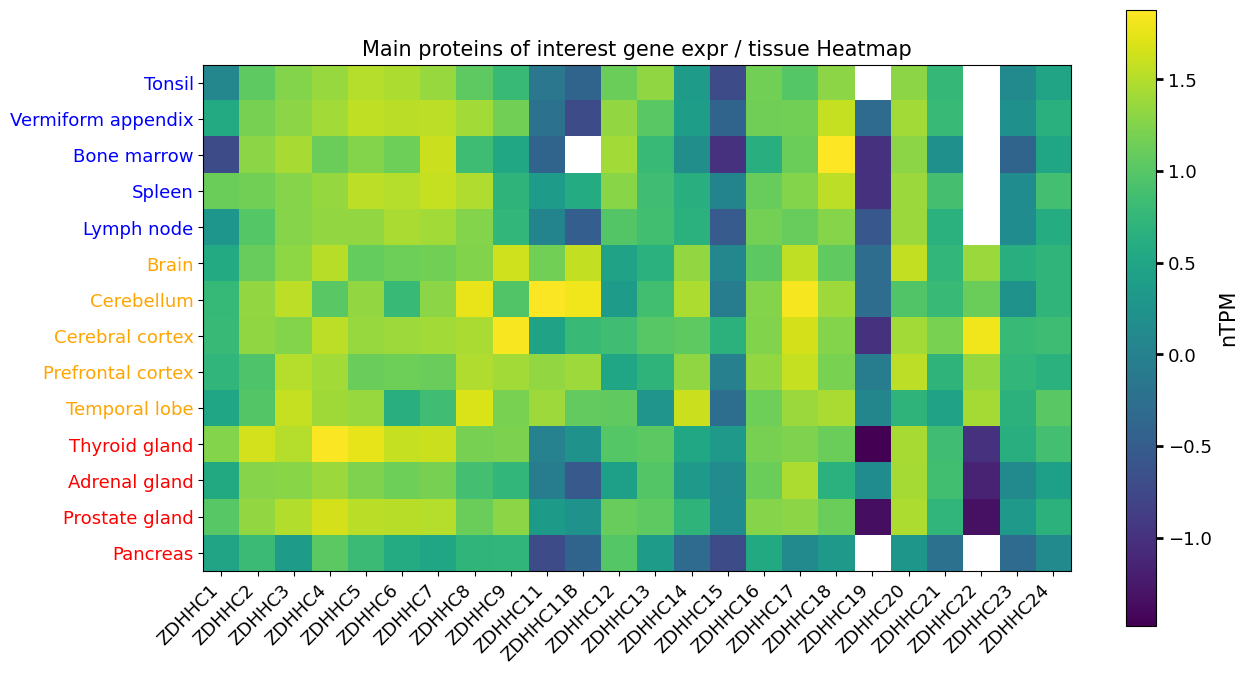

In [90]:
# Create the heatmap using matplotlib
fig, ax = plt.subplots(figsize=(14, 8))
df = rna_expression_df_zinc.loc[selected_tissues]
df = df.iloc[:, :-2]
im = ax.imshow(df, cmap='viridis')

# Add x and y axis labels
ax.set_xticks(range(len(df.columns)))
ax.set_xticklabels(df.columns, fontsize=13, rotation=45, ha='right')
ax.set_yticks(range(len(df.index)))
ax.set_yticklabels(df.index, fontsize=13)

# colour labels by organ
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_color(rna_expression_df_zinc.loc[tick.label1.get_text()]['color']) #set the color property

# Add a colorbar legend
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=13, length=5, width=2)
cbar.set_label("nTPM", fontsize=15)

# Add a title
ax.set_title('Main proteins of interest gene expr / tissue Heatmap', fontsize=15)

# Show/Save the plot
plt.show()
directory = os.path.expanduser("~/bioinf_isilon/core_bioinformatics_unit/Internal/max_vdl/coreBioinf/kalinchenko/tissueGeneEx/")
fig.savefig(f'{directory}/plots/proteomicsDB/zincProts_selectedTissues.pdf', bbox_inches='tight')
